# Ch10-5 카이제곱검정

목적: 두 **범주형 변수**가 서로 독립적인지 검정  

- 영 가설과 대립 가설  
$H_0$ : 두 변수가 서로 독립이다  
$H_1$ : 두 변수가 서로 종속된다  

- 시각화 방법 : 교차 테이블 

## 교차 테이블과 기대값  

- 교차 테이블 (contingency table)은 두 변수가 취할 수 있는 값의 조합의 출현 빈도를 나타냄  
- 세 변수(3차원)도 가능하지만 두 변수가 일반적임  

- 카테고리 $C_{i, j}$에 대한 기대값 $ = \frac {{N_i}\times{N_j}} {N} $  
($N$: 전체 샘플 수, $N_i$: 값 $i$를 갖는 샘플 수, $N_j$: 값 $i$를 갖는 샘플 수)  

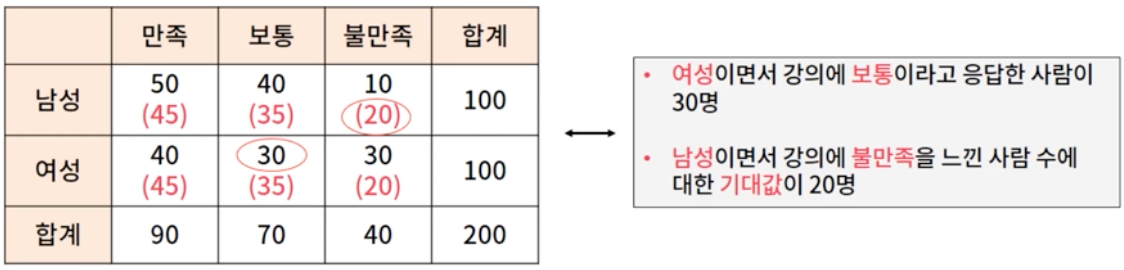

이때 성별이 남성이고 강의에 만족하는 사람의 기대값은 $ \frac {100 \times 40} {200} = 45 $

## 카이제곱 통계량
- 카이제곱 검정에 사용하는 카이제곱 통계량은 **기대값과 실제값의 차이**를 바탕으로 정의됨  
$$ \chi ^2 = \Sigma^{c}_{j=1} \frac { {o_j - E_j}^2 } {E_j} $$  
제곱으로 들어가는 이유는 둘의 차이가 양인지 음인지를 보고 싶은게 아니라 단순히 차이가 존재하는지를 보려는 것이기도 하고, 음의 차이와 양의 차이가 더해지면서 둘의 차이가 상쇄되지 않도록 제곱을 한 것이기도 하다.  
    - $c$: 카테고리의 개수 (두 변수의 상태 공간의 곱)  
    - $o_j$: 카테고리 j의 실제 값 (관측 값)  
    - $E_j$: 카테고리 j의 기대 값  
- 기대값과 실제값의 차이가 클 수록 통계량이 커지며, 통계량이 커질수록 영 가설이 기각될 가능성이 높아진다(즉, p-value가 감소함).  

## 파이썬을 이용한 카이제곱 검정 
- 교차 테이블 생성  
```
pandas.crosstable(S1, S2) 
```
    시리즈 S1, S2로 구성된 교차 테이블을 생성함.  
    각 값들은 범주형이 됨. 이론상 연속형도 가능하지만,  
    연속형이면 한 변수가 가지는 유니크 값이 너무 많기 때문에 테이블로서 의미가 없음.

- 카이제곱 검정  
```
scipy.stats.chi2_contingency(obs)
```
    교차 테이블의 실제값에 대한 기대값 계산.  
    보통 pandas.crosstable의 결과에 대한 values를 입력으로 투입함.  
    result = (chi2, pvalue, dof, expected)

### load data and check

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *

# data 불러오기
import os
os.chdir(r"/Users/Angela/Desktop/과속대학쿠쿠루/2. 탐색적 데이터 분석/데이터")

In [2]:
df = pd.read_csv("성별에따른만족도.csv", encoding = "cp949")
df.head()

# 카이제곱 검정에서는 아래에서 보듯 설문조사 결과같은 데이터가 가장 흔하다

,만족도,성별
0,불만족,남성
1,보통,여성
2,불만족,여성
3,보통,남성
4,만족,여성


In [4]:
df.만족도.unique()

array(['불만족', '보통', '만족'], dtype=object)

In [5]:
df.성별.unique()

array(['남성', '여성'], dtype=object)

### contingency table

In [6]:
# 교차 테이블 생성
cross_table = pd.crosstab(df['만족도'], df['성별'])
cross_table

성별,남성,여성
만족도,,
만족,50,40
보통,40,30
불만족,10,30


### obs from contingency table

값들만 가져와서 scipy.stats 에 넣을 준비를 한다. 

In [7]:
obs = cross_table.values
obs

array([[50, 40],
       [40, 30],
       [10, 30]])

### chi square test

chi2_contingency 로 값들을 얻는데, 튜플형태로 받아와서 p-value 먼저 보기로 한다. 

In [8]:
from scipy.stats import *
statistics, pvalue, dof, expected = chi2_contingency(obs)
print(pvalue)

0.001892528960792166


pvalue가 0.0018로 (유의수준 0.05 로 잡았다면) 차이가 있다, 즉 독립이 아니고 종속적임을 확인할 수 있는 것이다. 즉, 두 변수 간 독립이 아님을 확인.

### expected values to DataFrame

expected는 ndarray 형태인데 보기 좋도록 데이터프레임으로 만든다.  
위에서 만들었던 교차 테이블을 활용하여 그대로 인덱스와 컬럼을 사용하여 정리할 수 있다.  

In [9]:
expected

array([[45., 45.],
       [35., 35.],
       [20., 20.]])

In [10]:
# 기대값
pd.DataFrame(expected, 
             columns = cross_table.columns, index = cross_table.index)

성별,남성,여성
만족도,,
만족,45.0,45.0
보통,35.0,35.0
불만족,20.0,20.0
